**Following 4 blocks are to read the file from the Google Drive**

In [47]:
# To run from colab remove # from below
#!pip install PyDrive

  Created wheel for PyDrive: filename=PyDrive-1.3.1-cp37-none-any.whl size=27441 sha256=850b9633d95c77d37e23ae9b2210154176414488959524e08fe3a43b5c27c761
  Stored in directory: C:\Users\prasa\AppData\Local\pip\Cache\wheels\fa\d2\9a\d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
  Created wheel for googleapis-common-protos: filename=googleapis_common_protos-1.51.0-cp37-none-any.whl size=77603 sha256=a9c170e55901661dfed51ce7fafa7834c875ff855a4888ca19d016f83ec75e20
  Stored in directory: C:\Users\prasa\AppData\Local\pip\Cache\wheels\2c\f9\7f\6eb87e636072bf467e25348bbeb96849333e6a080dca78f706
Successfully built PyDrive googleapis-common-protos


In [2]:
# To run from colab remove # from below
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials

In [3]:
# To run from colab remove # from below
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

In [4]:
# To run from colab remove # from below
#downloaded = drive.CreateFile({'id':"1SKsWeGPQooswSmpBMhvvDNDU6SJbzI58"})   # replace the id with id of file you want to access
#downloaded.GetContentFile('insurance.csv')        # replace the file name with your file

**1. Import the necessary libraries (2 marks)**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats # some useful stuff
from scipy.stats import ttest_ind
import statsmodels.stats.weightstats as wstats
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ks_2samp

**2. Read the data as a data frame (2 marks)**

In [6]:
# Below 2 lines are two upload file from local drive to colab
#from google.colab import files
#uploaded = files.upload()

In [4]:
# csv file needs to be in the google drive if using colab
# csv file needs to be in the same location as ipynb if using notebook
data = pd.read_csv("insurance.csv")

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**3. Perform basic EDA which should include the following and print out your** **insights at every step. (28 marks)**

**a. Shape of the data (2 marks)** 

In [9]:
shape = data.shape
print ('shape =', shape)

shape = (1338, 7)


**b. Data type of each attribute**

In [10]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

**c. Checking the presence of missing values**

In [11]:
data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [12]:
data.notnull()

,age,sex,bmi,children,smoker,region,charges
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
1333,True,True,True,True,True,True,True
1334,True,True,True,True,True,True,True
1335,True,True,True,True,True,True,True
1336,True,True,True,True,True,True,True


**d. 5 point summary of numerical attributes (3 marks)**

In [13]:
data.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [14]:
data.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [15]:
data.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

**e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. (4 marks)**

**This is post evaluation**

Inferences from Distribution of ‘bmi’, ‘age’ and ‘charges’ columns are clearly missing. e.g. 'bmi' looks quiet normally distributed; 'charges' are highly skewed. 

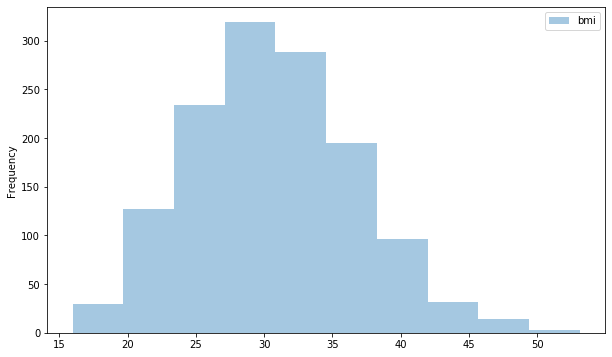

In [16]:
data.bmi.plot(kind='hist', figsize=[10,6], alpha=.4, legend=True)

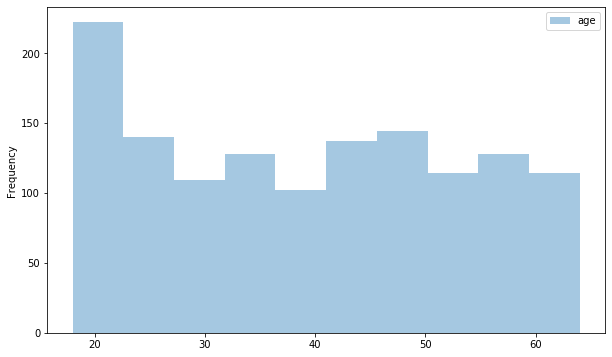

In [17]:
data.age.plot(kind='hist', figsize=[10,6], alpha=.4, legend=True)

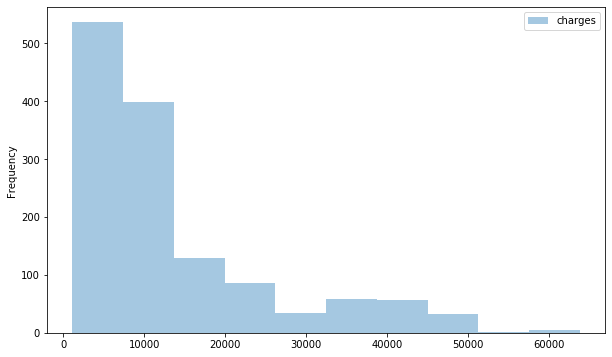

In [18]:
data.charges.plot(kind='hist', figsize=[10,6], alpha=.4, legend=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D2A71741C8>]],
      dtype=object)

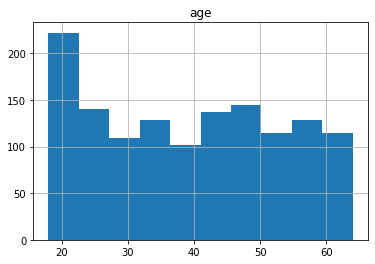

In [19]:
data.hist(column='age')

**f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns (2 marks)**

In [20]:
data.bmi.skew(axis = 0, skipna = True)

0.2840471105987448

In [21]:
data.age.skew(axis = 0, skipna = True)

0.05567251565299186

In [22]:
data.charges.skew(axis = 0, skipna = True)

1.5158796580240388

**g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns (4 marks)**

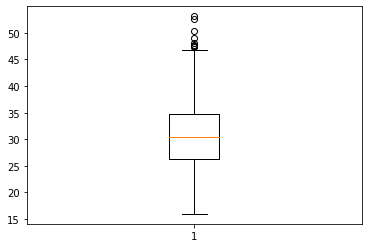

In [23]:
plt.boxplot(data.bmi)
plt.show()

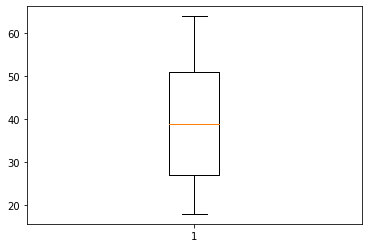

In [24]:
plt.boxplot(data.age)
plt.show()

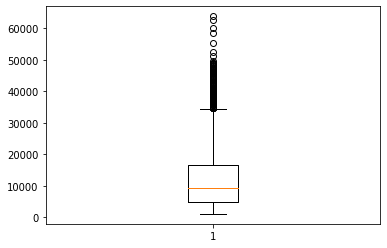

In [25]:
plt.boxplot(data.charges)
plt.show()

**h. Distribution of categorical columns (include children) (4 marks)**

**This is post evaluation**

Inferences from distribution of categorical columns (including children) are missing. e.g. Gender is evenly distributed.

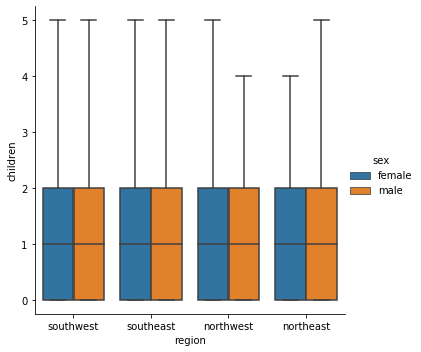

In [26]:
sns.catplot(x="region", y="children", hue="sex", kind="box", data=data);

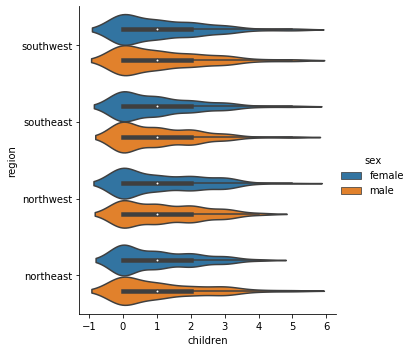

In [27]:
sns.catplot(x="children", y="region", hue="sex", kind="violin", data=data);

**i. Pair plot that includes all the columns of the data frame (4 marks)**

**This is post evaluation**

Pair plot analysis: Inferences from Pair plot analysis are missing. e.g. - There's an interesting pattern between 'age' and 'charges. Could be because for the same ailment, older people are charged more than the younger ones - The only obvious correlation of 'charges' is with 'smoker' - Looks like smokers claimed more money than non-smokers.

Pair plot Analysis: Label encoding the categorical variables before doing a pair plot is advisable in order to include categorical variables in the pair plot analysis, as pair plot ignores Categorical variables that are in character/string format. e.g. You could have converted the string/character variables to numerical format using Label encoding and plot the graph as shown below. df.loc[:,['sex', 'smoker', 'region']] = df.loc[:,['sex', 'smoker', 'region']].apply( LabelEncoder().fit_transform ) sns.pairplot(df) plt.show() 

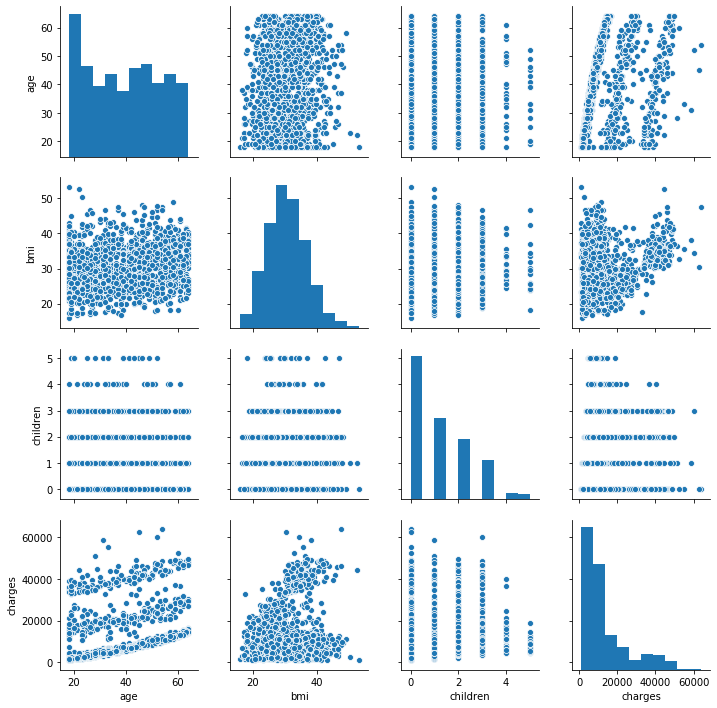

In [28]:
sns.pairplot(data)

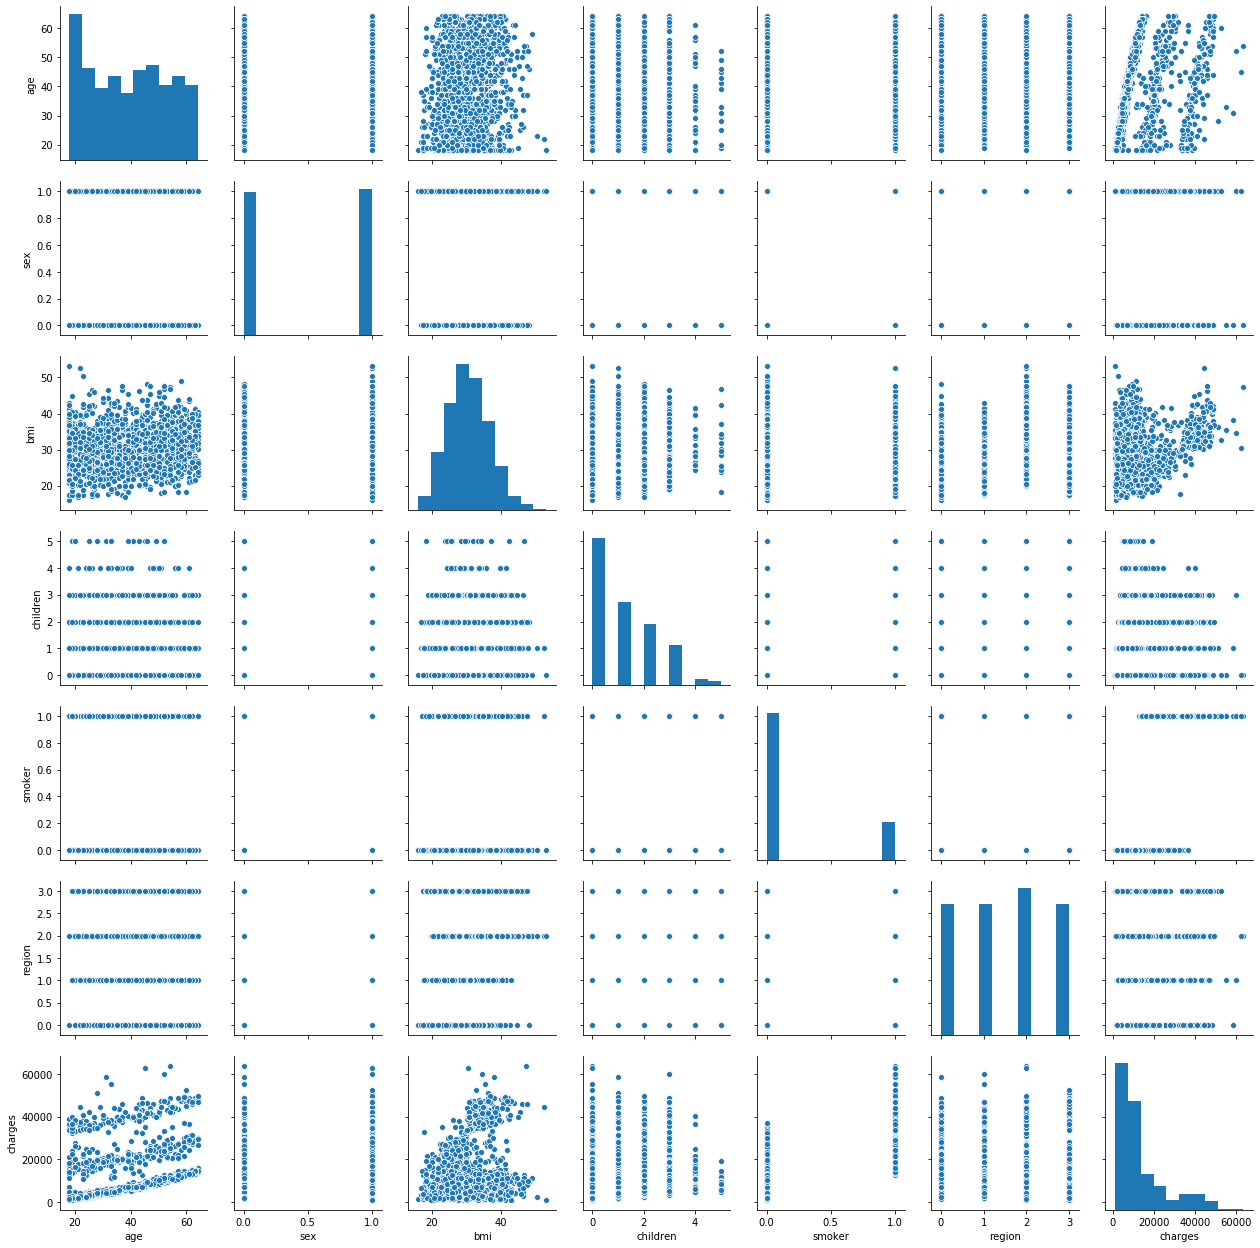

In [39]:
#**This is post evaluation**
from sklearn.preprocessing import LabelEncoder
data.loc[:,['sex', 'smoker', 'region']] = data.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform)
sns.pairplot(data) 
plt.show() 

**4. Answer the following questions with statistical evidence (28 marks)**

**a. Do charges of people who smoke differ significantly from the people who don't? (7 marks)**

Ans) Yes the meadian value of the Charges for the two categories Smoker and NonSmoker are siginificantly different as shown below with 5 point summary by Box plot and t-test

**This is post evaluation**

Inferences from distribution of categorical columns (including children) are missing. e.g. Lot of non-smokers compared to smokers in the data.

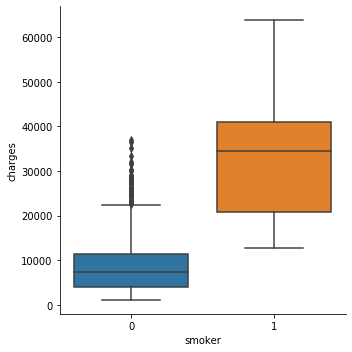

In [40]:
sns.catplot(x="smoker", y="charges", kind="box", data=data);

In [6]:
#difference of mean is significant
data[data['smoker'] == 'yes']['charges'].mean()-data[data['smoker'] == 'no']['charges'].mean()


23615.96353367665

In [7]:
#two sample t test of means
# H0 = no difference in means of charges
# Ha = there is difference in means of charges
smoker = data[data['smoker'] == 'yes']['charges']
non_smoker = data[data['smoker'] == 'no']['charges']
stats.ttest_ind(smoker, non_smoker) 

Ttest_indResult(statistic=46.664921172723716, pvalue=8.271435842177219e-283)

since the pvalue is very less than 0.05, we reject null hypothesis and hence proved there is significant difference between charges for smoker and nonsmoker

**b. Does bmi of males differ significantly from that of females? (7 marks)**

Ans) No, bmi of males is not differ siginificantly from that of females as shown below with 5 point summary by the box plot and t-test.

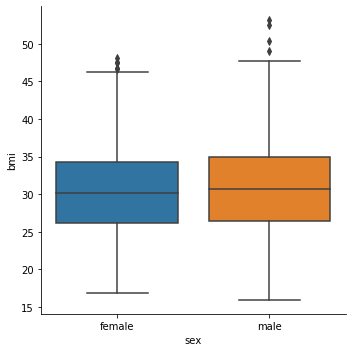

In [8]:
sns.catplot(x="sex", y="bmi", kind="box", data=data);

In [9]:
#two sample t test of means
# H0 = no difference in means of bmi
# Ha = there is difference in means of bmi
male = data[data['sex'] == 'male']['bmi']
female = data[data['sex'] == 'female']['bmi']
stats.ttest_ind(male, female) 

Ttest_indResult(statistic=1.696752635752224, pvalue=0.08997637178984934)

since the pvalue is greater than 0.05, we accept null hypothesis and hence proved that the bmi is same for male and female

**c. Is the proportion of smokers significantly different in different genders? (7 marks)**

Ans) Yes, there is difference in proportion of smokers between different genders as proved by the following z-test

**This is post evaluation**

Answering the following questions using visual plots could have been attempted before running Statistical inference tests that would help in understanding if the EDA observations are Inline with statistical results. Q4.c. Is the proportion of smokers significantly different in different genders? 

In [10]:
# Two Samples z-test for Proportions
# H0 = no difference in proportions
# Ha = there is difference in proportions
men = data[data['sex'] == 'male']['sex'].count()
women = data[data['sex'] == 'female']['sex'].count()
men_s = data[(data['sex'] == 'male') & (data['smoker'] == 'yes')]['sex'].count()
women_s = data[(data['sex'] == 'female') & (data['smoker'] == 'yes')]['sex'].count()
print (men, women, men_s,women_s)

676 662 159 115


In [14]:
female = data[data['sex'] == 'female']['bmi']
count_s = np.array([men_s,women_s])
nobs = np.array([men, women])
z,p = proportions_ztest(count_s, nobs, value=0, alternative='two-sided')
print(' z-stat = {z} \n p-value = {p}'.format(z=z,p=p))

 z-stat = 2.7867402154855503 
 p-value = 0.005324114164320532


since the pvalue is less than 0.05, we reject null hypothesis and hence proved that there is difference in proportion of smokers between genders.

**d. Is the distribution of bmi across women with no children, one child and two children, the same? (7 marks)**

Ans) Yes, Three distributions are identical as proved by the following K-S statistic test

**This is post evaluation**

Answering the following questions using visual plots could have been attempted before running Statistical inference tests that would help in understanding if the EDA observations are Inline with statistical results. Q4.d. Is the distribution of bmi across women with no children, one child and two children, the same?

In [11]:
#  two-sample Kolmogorov-Smirnov test
# H0 = Three distributions are identical
# Ha = Three distributions are not identical
w_0c = data[(data['sex'] == 'female') & (data['children'] == 0)]['bmi']
w_1c = data[(data['sex'] == 'female') & (data['children'] == 1)]['bmi']
w_2c = data[(data['sex'] == 'female') & (data['children'] == 2)]['bmi']

In [12]:
ks_2samp(w_0c, w_1c)

Ks_2sampResult(statistic=0.053260917174017784, pvalue=0.914368684017628)

In [13]:
ks_2samp(w_0c, w_2c)

Ks_2sampResult(statistic=0.10479485912011864, pvalue=0.29006881832172293)

Three distributions are identical. If the K-S statistic is small or the p-value is high (greater than the significance level, say 5%), then we cannot reject the hypothesis that the distributions of the three samples are the same.